# Linear Regression Optimization approach

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [9]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


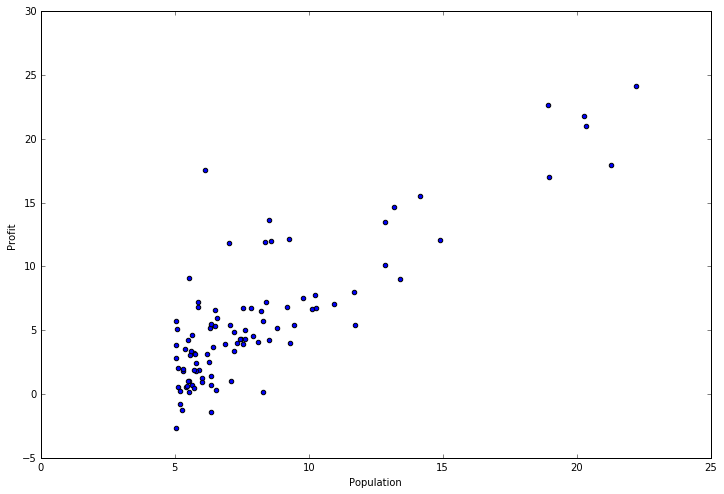

In [11]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [12]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [13]:
data.insert(0, 'Ones', 1)

In [14]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [15]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [16]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [17]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [18]:
theta

matrix([[0, 0]])

In [19]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [20]:
computeCost(X, y, theta)

32.072733877455676

In [21]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [22]:
alpha = 0.01
iters = 1000

In [23]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [24]:
computeCost(X, y, g)

4.5159555030789118

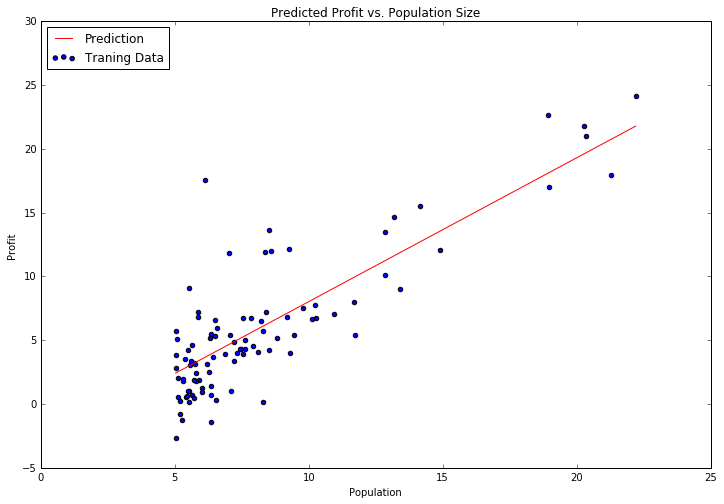

In [25]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

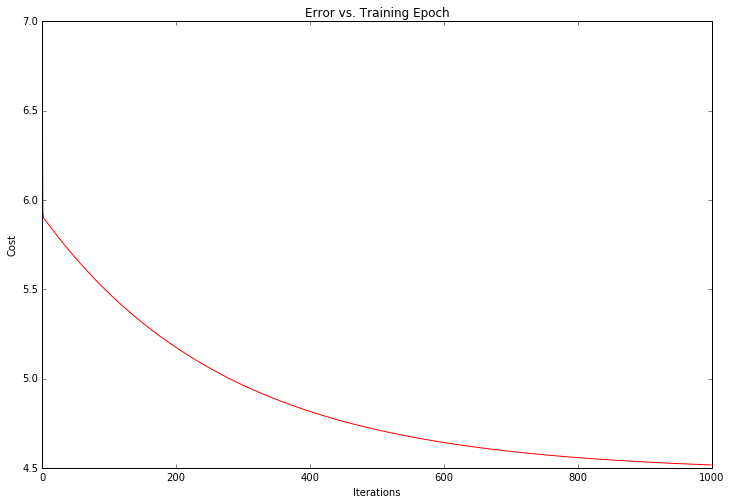

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Bayesian Linear Regression (Analytical)

In [27]:
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
from matplotlib.colors import LogNorm

In [28]:
class BayesianLinearRegression:
  """
    Linear regression model: y = w[0]+w[1]x
    w ~ N(0,alpha^2*I)
    P(y|x,w,sigma) ~ N(y|x.dot(w),sigma**2)
  """

  def __init__(self, alpha=np.sqrt(10.), w_mu=0, sigma=5, fit_intercept=True):
    """
      alpha: standard deviation of the prior for each of the feature dimensions.
      w_mu:  the mean of the prior
      sigma: variance of the prediction error.
    """
    self.alpha = np.asarray(alpha)
    self.w_mu  = np.asarray(w_mu)
    self.sigma = sigma
    self.fit_intercept = fit_intercept

  def add_intercept(self, X):
    X_new = np.ones((X.shape[0],X.shape[1]+1), dtype=X.dtype)
    X_new[:,1:] = X[:,:]
    return X_new

  def fit_ml(self, X, y):
    """
      Fit a Maximum Likelihood estimate. (not Bayesian)
      X: features, n_samples by n_features nd-array
      y: target values, n_samples array
    """
    if self.fit_intercept:
      X = self.add_intercept(X)
    self.w = LA.inv(X.T.dot(X)).dot(X.T.dot(y))

  def fit_map(self, X, y):
    """
      Fit a MAP estimate
      X: features, n_samples by n_features nd-array
      y: target values, n_samples array
    """
    if self.fit_intercept:
      X = self.add_intercept(X)
    
    #data setup
    f_dim = X.shape[1]
    w_mu = self.w_mu
    sigma = self.sigma
    alpha = self.alpha
    
    #Posterior distribution
    S_0_inv = np.diagflat(1./np.asarray(alpha*alpha))
    S_pos = LA.inv( S_0_inv + 1./(sigma*sigma)*X.T.dot(X)   )
    mu_pos = S_pos.dot( S_0_inv.dot(w_mu) +1./(sigma*sigma)*X.T.dot(y) ) 
    
    self.w = mu_pos
    self.Sigma = S_pos
    
  def predict(self, X):
    if self.fit_intercept:
      X = self.add_intercept(X)
    return X.dot(self.w)

In [29]:
"""
  Run some tests on the Bayesian Linear Regression.
"""

'\n  Run some tests on the Bayesian Linear Regression.\n'

In [30]:
#For quntifying prediction error
def mse(X,y,clf):
    d = y-clf.predict(X)
    return 1/float(len(y)) * d.T.dot(d)

#read some test data
Xtest = np.loadtxt("Xtest.txt")
Xtrain = np.loadtxt("Xtrain.txt")

y_test = np.loadtxt("Ytest.txt")
y_train = np.loadtxt("Ytrain.txt")

n_samples = [2,10,100]

def run_clf(clf):
  for n in n_samples:
      X = Xtrain[:n]
      y = y_train[:n]
      clf.fit_map(X,y)
      error_map = mse(Xtest,y_test,clf)
      clf.fit_ml(X,y)
      error_ml = mse(Xtest,y_test,clf)

      print "samples: %d, ML mse: %f MAP mse: %f" % (n,error_ml, error_map)


# test different initializations of the classifier:


In [31]:
print "vector arguments"
clf =   BayesianLinearRegression(
        alpha=np.array([3.,3.]),
        w_mu=([0.,0.]),
        sigma=5, fit_intercept=False,
        )
run_clf(clf)

vector arguments
samples: 2, ML mse: 170.249002 MAP mse: 167.980245
samples: 10, ML mse: 27.021498 MAP mse: 37.237198
samples: 100, ML mse: 26.476821 MAP mse: 26.811581


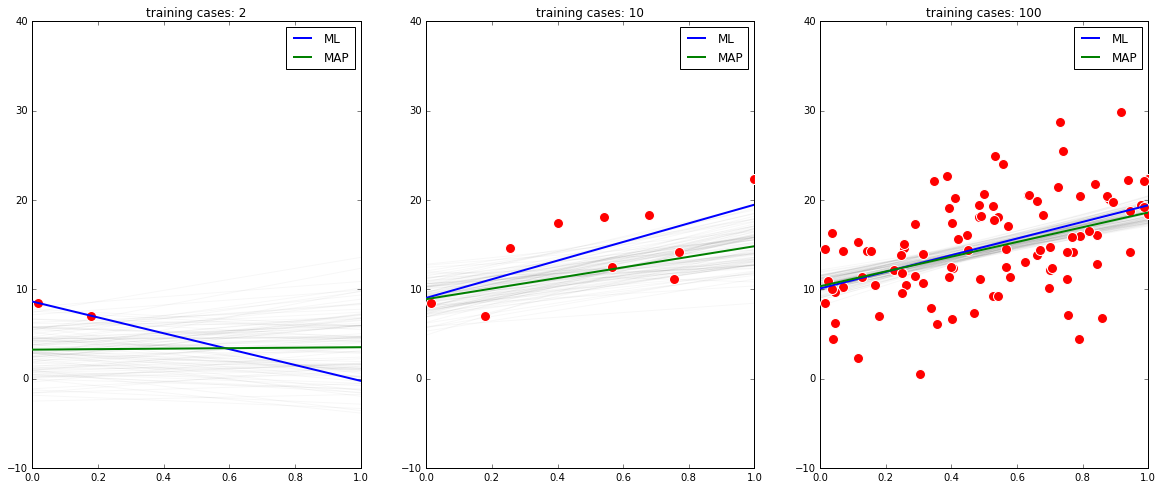

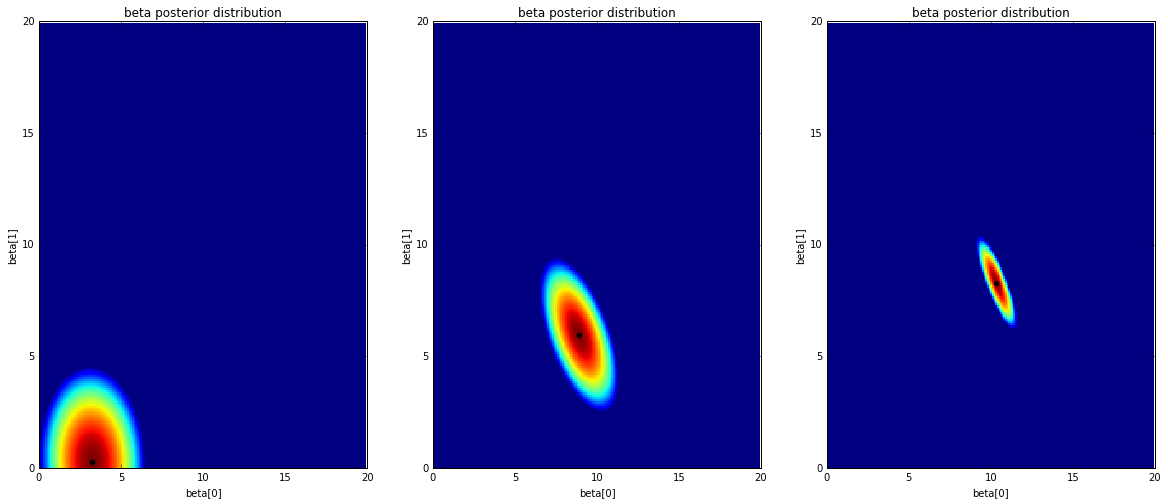

In [32]:
#let's do some interesting plots:


fig = plt.figure(figsize=(20,8))
for i,n in enumerate(n_samples):
    X = Xtrain[:n]
    y = y_train[:n]

    clf.fit_map(X,y)
    beta_map = clf.w
    error_map = mse(Xtest,y_test,clf)
    Sigma = clf.Sigma
#    Sigma_inv = LA.inv(Sigma)

    clf.fit_ml(X,y)
    beta_ml = clf.w
    error_ml = mse(Xtest,y_test,clf)

    ax=plt.subplot(1,3,i+1)
    ax.set_xlim(0,1)
    ax.set_ylim(-10,40)
   #draw from posterior:
    for i in range(0,100):#10000):
      beta = multivariate_normal(beta_map, Sigma)
      ax.plot([0, 1.0], [beta[0], beta[0]+1.0*beta[1]], color='k', linestyle='-', linewidth=1,zorder=1, alpha=0.03)
    ax.plot([0, 1.0], [beta_ml[0], beta_ml[0]+1.0*beta_ml[1]], linestyle='-', linewidth=2, label="ML",zorder=100)
    ax.plot([0, 1.0], [beta_map[0], beta_map[0]+1.0*beta_map[1]], linestyle='-', linewidth=2, label="MAP",zorder=100)

    ax.scatter(X[:,1],y, marker="o", color='r', edgecolor="white", s=100,zorder=10)
 
    plt.legend()
    plt.title("training cases: %d" % n)

fname = "ml_vs_map.png"
fig.savefig(fname)

#some plots of the beta posterior distribution:

fig = plt.figure(figsize=(20,8))
plt.clf()
for i,n in enumerate(n_samples):
    X = Xtrain[:n]
    y = y_train[:n]

    clf.fit_map(X,y)
    beta_map = clf.w
    error_map = mse(Xtest,y_test,clf)
    Sigma = clf.Sigma
    Sigma_inv = LA.inv(Sigma)

    clf.fit_ml(X,y)
    beta_ml = clf.w
    error_ml = mse(Xtest,y_test,clf)

    mu = beta_map
    ax=plt.subplot(1,3,i+1)
    delta = 0.1
    x = np.arange(0., 20.0, delta)
    y = np.arange(0., 20.0, delta)
    z = np.zeros((len(x),len(y)))
    xx,yy = np.meshgrid(x, y)
    q = np.log(np.power(LA.det(2 * np.pi * Sigma),-0.5))
    for i in range(len(x)):
      for j in range(len(y)):
        beta = np.array([xx[i,j], yy[i,j]])
        d = beta - mu
        r = 1
        # d is a row vector -> therefore the transpose is the other way around
        r += -0.5 * d.dot(Sigma_inv).dot(d[:,np.newaxis])
        z[i,j] = r
    #cs = plt.contour(xx, yy, z, 20, colors='k')
    #plt.clabel(cs, inline=1, fontsize=10)
    plt.pcolor(xx,yy,z,vmin=0.,vmax=1)
    plt.scatter(mu[0],mu[1],c='k')
    plt.xlabel("beta[0]")
    plt.ylabel("beta[1]")
    plt.xlim(0,20)
    plt.ylim(0,20)

    plt.title("beta posterior distribution")

fname = "posterior.png"
fig.savefig(fname)
plt.show()








# Bayesian Linear Regression (Sampling Approach)

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import prettyplotlib as ppl

In [34]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

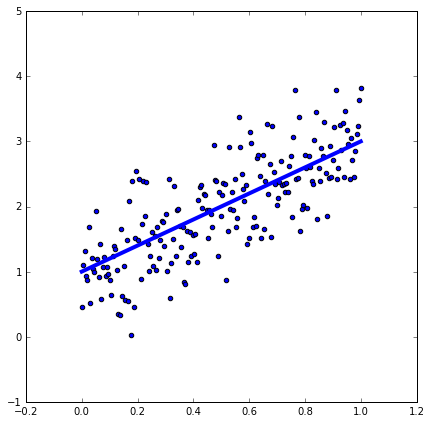

In [35]:
fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, xlabel='Value of gold', ylabel='Value of gold miners', title='Synthetic data and underlying model')
plt.scatter(x, y, label='sampled data')
plt.plot(x, true_regression_line, label='true regression line', linewidth=4.)
#ax.legend(loc=2);

In [36]:
from pymc3 import Model, Normal, HalfNormal, Uniform

simple_model = Model()
with simple_model:

    # Define priors
    alpha = Normal('alpha', mu=0, sd=20)
    beta = Normal('beta', mu=0, sd=20)
    sigma = Uniform('sigma', lower=0, upper=20)
    
    # Define linear regression
    y_est = alpha + beta * x
    
    # Define likelihood
    likelihood = Normal('y', mu=y_est, sd=sigma, observed=y)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.


from pymc3 import find_MAP

map_estimate = find_MAP(model=simple_model)

print(map_estimate)

In [37]:
from pymc3 import sample, find_MAP
with simple_model:

    # obtain starting values via MAP
    start = find_MAP(model=simple_model)

    # draw 2000 posterior samples
    trace = sample(2000, start=start)

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_interval_
 [-----------------100%-----------------] 2000 of 2000 complete in 4.2 sec

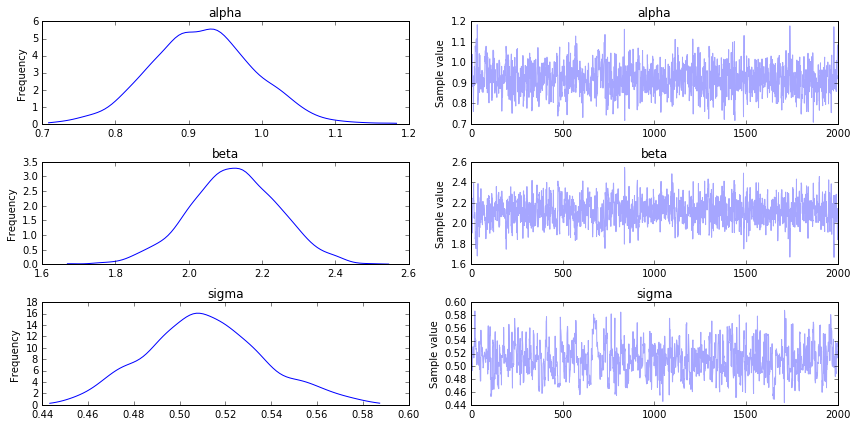

In [38]:
from pymc3 import traceplot
traceplot(trace);

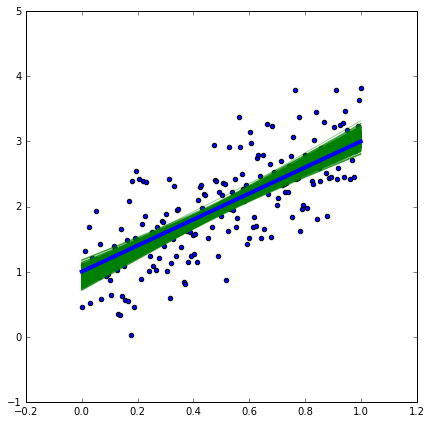

In [39]:
aa=trace['alpha'];
bb=trace['beta'];

plt.figure(figsize=(7, 7))
plt.scatter(x, y, label='sampled data')
for a,b in zip(aa,bb):
    plt.plot(x, a + b*x, 'g-', alpha=0.4)
plt.plot(x, true_regression_line,'b-', label='true regression line', linewidth=4.)


# Motivation for Regularization
Examples come from : https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

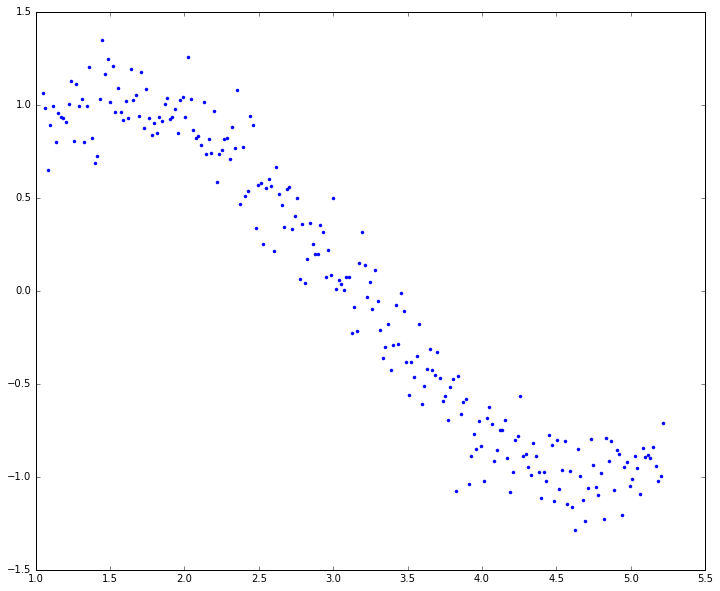

In [42]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,1)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [43]:
y

array([ 1.06576338,  0.98191155,  0.65113755,  0.88974895,  0.99199444,
        0.79829495,  0.9533722 ,  0.93678713,  0.92782757,  0.90739039,
        1.00464655,  1.12597418,  0.80629667,  1.11054587,  0.99555622,
        1.03269647,  0.79980539,  0.9946406 ,  1.20082815,  0.81965645,
        0.68814851,  0.7261825 ,  1.03017859,  1.35029125,  1.16307558,
        1.24708803,  1.01243643,  1.20832899,  0.95870363,  1.09182832,
        0.95990242,  0.91745134,  1.01929707,  0.92720823,  1.19383501,
        1.02544669,  1.05455339,  0.9419013 ,  1.17873891,  0.87789292,
        1.08384249,  0.9289964 ,  0.8372326 ,  0.90096948,  0.84960705,
        0.93402118,  0.91039066,  1.00313025,  1.03582942,  0.92340554,
        0.93580682,  0.97694456,  0.84620199,  1.02672886,  1.03987917,
        0.93684491,  1.2579996 ,  1.02862536,  0.86610672,  0.82029264,
        0.83119807,  0.78190797,  1.01736587,  0.73399906,  0.81686924,
        0.73975763,  0.96594442,  0.58585211,  0.73363588,  0.75

In [44]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print data.head()

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.064651  0.981912  1.133481  1.206762  1.284780  1.367842  1.456274   
2  1.082104  0.651138  1.170949  1.267089  1.371122  1.483697  1.605515   
3  1.099557  0.889749  1.209027  1.329394  1.461745  1.607273  1.767289   
4  1.117011  0.991994  1.247713  1.393709  1.556788  1.738948  1.942424   

        x_7       x_8       x_9      x_10      x_11      x_12      x_13  \
0  1.381021  1.446202  1.514459  1.585938  1.660790  1.739176  1.821260   
1  1.550424  1.650660  1.757377  1.870992  1.991954  2.120735  2.257842   
2  1.737334  1.879977  2.034331  2.201357  2.382098  2.577678  2.789316   
3  1.943235  2.136699  2.349423  2.583326  2.840515  3.123309  3.434258   
4  2.169709  2.423588  2.707173  3.023942  3.377775  3.773011  4.214494   

       x_14      x_15  
0  1.907219  1.997235  
1  2.403814  2.559222  
2  3.018331  3.266148  
3 

In [45]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

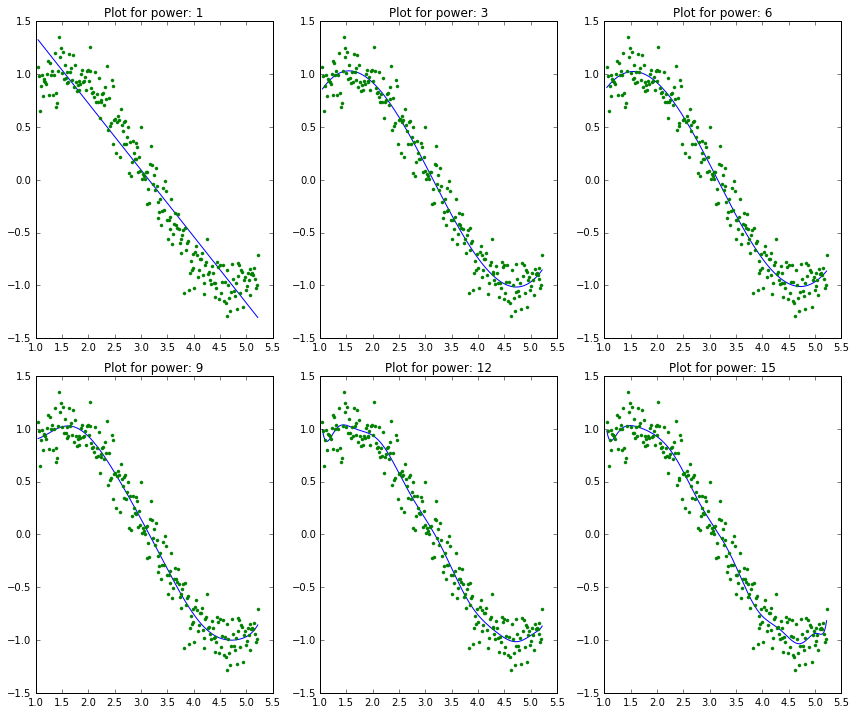

In [46]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [79]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


# Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

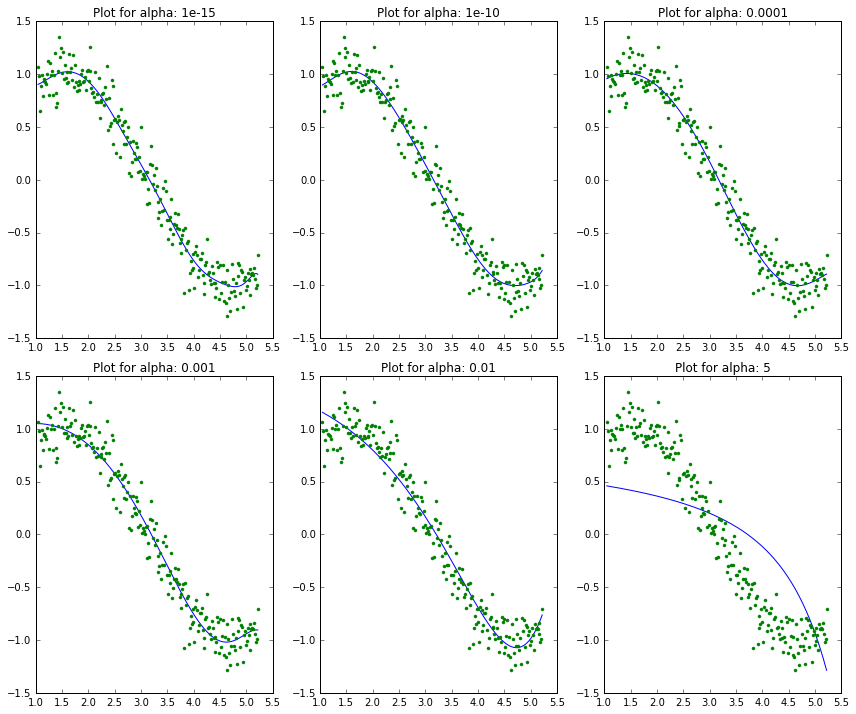

In [48]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [49]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,4.9,21,-89,1.6e+02,-1.7e+02,1.1e+02,-39,7.1,0.11,-0.25,0.01,0.0082,-0.00041,-0.00033,5.8e-05,-3e-06,1.4e-09
alpha_1e-10,4.9,3.2,-7.7,8.7,-4,0.55,0.089,-0.015,-0.0041,4.2e-05,0.00015,2.1e-05,-2.1e-06,-1.1e-06,-5.4e-08,4.3e-08,-2.9e-09
alpha_1e-08,4.9,-0.2,1.2,0.11,-0.33,0.036,0.011,-0.00017,-0.00038,-5.8e-05,2.5e-06,2.6e-06,4.7e-07,4.7e-09,-1.9e-08,-3.9e-09,6.9e-10
alpha_0.0001,5,0.38,0.82,-0.22,-0.032,-0.0013,0.00045,0.00014,2.5e-05,3e-06,1.6e-07,-4e-08,-1.6e-08,-3.6e-09,-5.1e-10,-1.4e-11,2.2e-11
alpha_0.001,5.4,0.91,0.26,-0.099,-0.019,-0.0021,-5.5e-05,3.8e-05,1.2e-05,2.6e-06,4.6e-07,6.6e-08,7.1e-09,1.9e-10,-1.9e-10,-7.5e-11,-2.1e-11
alpha_0.01,6.5,1.4,-0.14,-0.05,-0.009,-0.0012,-9.6e-05,2.7e-06,3.5e-06,1e-06,2.2e-07,4e-08,6.3e-09,7.8e-10,4.2e-11,-1.6e-11,-8.1e-12
alpha_1,23,0.96,-0.14,-0.019,-0.003,-0.00046,-6.8e-05,-9.7e-06,-1.3e-06,-1.5e-07,-1.1e-08,8.5e-10,6.6e-10,2.1e-10,5.5e-11,1.3e-11,3e-12
alpha_5,56,0.53,-0.06,-0.0085,-0.0014,-0.00024,-4e-05,-6.8e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.1e-10,-1.3e-10,-2e-11,-3e-12,-4.3e-13
alpha_10,73,0.38,-0.038,-0.0056,-0.00095,-0.00017,-2.9e-05,-5.2e-06,-9.1e-07,-1.6e-07,-2.8e-08,-5e-09,-8.9e-10,-1.6e-10,-2.8e-11,-4.9e-12,-8.7e-13
alpha_20,93,0.26,-0.023,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.5e-07,-1.2e-07,-2.2e-08,-4e-09,-7.3e-10,-1.3e-10,-2.5e-11,-4.5e-12,-8.4e-13


In [50]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

# Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/Users/Jinkyoo/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


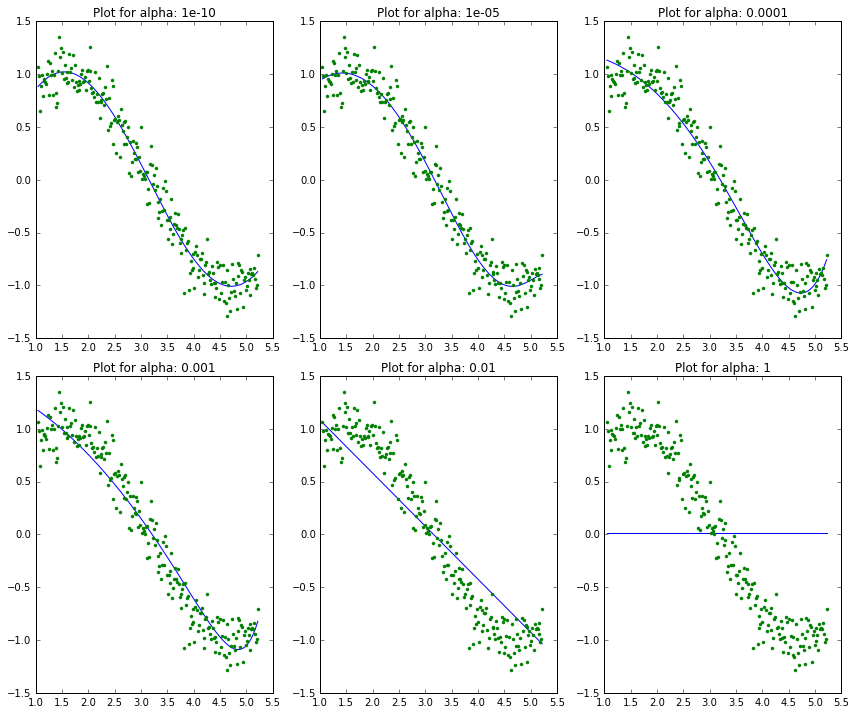

In [52]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [53]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,4.9,-0.43,2,-0.68,0.005,0.0063,0.00082,5e-05,-2.6e-06,-1.2e-06,-1.9e-07,-1.9e-08,-6e-10,2.1e-10,5.3e-11,5.3e-12,-7.9e-13
alpha_1e-10,4.9,-0.43,2,-0.68,0.005,0.0063,0.00082,5e-05,-2.6e-06,-1.2e-06,-1.9e-07,-1.9e-08,-6e-10,2.1e-10,5.3e-11,5.3e-12,-7.8e-13
alpha_1e-08,4.9,-0.42,1.9,-0.68,0.005,0.0063,0.00082,4.9e-05,-2.4e-06,-1.1e-06,-2e-07,-1.9e-08,-5.5e-10,1.8e-10,4e-11,3.3e-12,-3.4e-14
alpha_1e-05,5,0.21,1.1,-0.4,-0,0,0,0.00017,1.1e-05,0,0,0,-0,-0,-0,-0,-1.5e-11
alpha_0.0001,6.2,1.2,0,-0.071,-0.017,-0,0,0,0,4.2e-06,0,0,0,0,-0,-0,-0
alpha_0.001,8,1.5,-0.17,-0.087,-0,-0,-0,0,0,0,0,0,0,0,0,2.6e-11,1.2e-11
alpha_0.01,18,1.6,-0.5,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_1,1.5e+02,0.011,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,1.5e+02,0.011,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,1.5e+02,0.011,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [54]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05     10
alpha_0.0001    12
alpha_0.001     11
alpha_0.01      14
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

### Model Selection